# 10주차: 09장 데이터분석 프로젝트

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus = False)

In [4]:
pd.set_option('display.precision', 2)

In [5]:
%config InlineBackend.figure_format = 'retina'

In [8]:
!pip install pyreadstat 

   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.4 MB 2.6 MB/s eta 0:00:01
   ------- -------------------------------- 0.5/2.4 MB 5.9 MB/s eta 0:00:01
   ----------------- ---------------------- 1.1/2.4 MB 9.6 MB/s eta 0:00:01
   ---------------------------------- ----- 2.1/2.4 MB 12.1 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 12.7 MB/s eta 0:00:00


In [9]:
raw_welfare = pd.read_spss('data/Koweps_hpwc14_2019_beta2.sav')
raw_welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,2.01e+04,0.0,NaN,0.29,0.29,1307.76,1307.76,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,3.01e+04,0.0,NaN,0.42,0.42,1882.57,1882.57,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,4.01e+04,0.0,NaN,0.27,0.27,1189.69,1192.91,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,6.01e+04,0.0,NaN,0.49,0.50,2219.63,2224.27,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,6.01e+04,0.0,NaN,1.02,1.02,4565.39,4565.39,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [10]:
raw_welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [11]:
welfare = raw_welfare.copy()
welfare.shape

(14418, 830)

In [12]:
welfare = welfare.rename(columns= {'h14_g3': 'sex', 
                                   'h14_g4': 'birth',
                                   'h14_g10': 'marriage_type',
                                   'h14_g11': 'religion',
                                   'p1402_8aq1': 'income',
                                   'h14_eco9': 'code_job',
                                   'h14_reg7': 'code_region'})
welfare['sex']

0        2.0
1        1.0
2        1.0
3        1.0
4        2.0
        ... 
14413    2.0
14414    2.0
14415    1.0
14416    2.0
14417    1.0
Name: sex, Length: 14418, dtype: float64

In [13]:
welfare.birth.dtypes

dtype('float64')

In [14]:
welfare.birth.isna().sum()

0

In [15]:
welfare.sex.isna().sum()

0

In [16]:
welfare.sex.value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [19]:
plt.rcParams.update({'figure.figsize': [5, 3]})

<Axes: xlabel='sex', ylabel='count'>

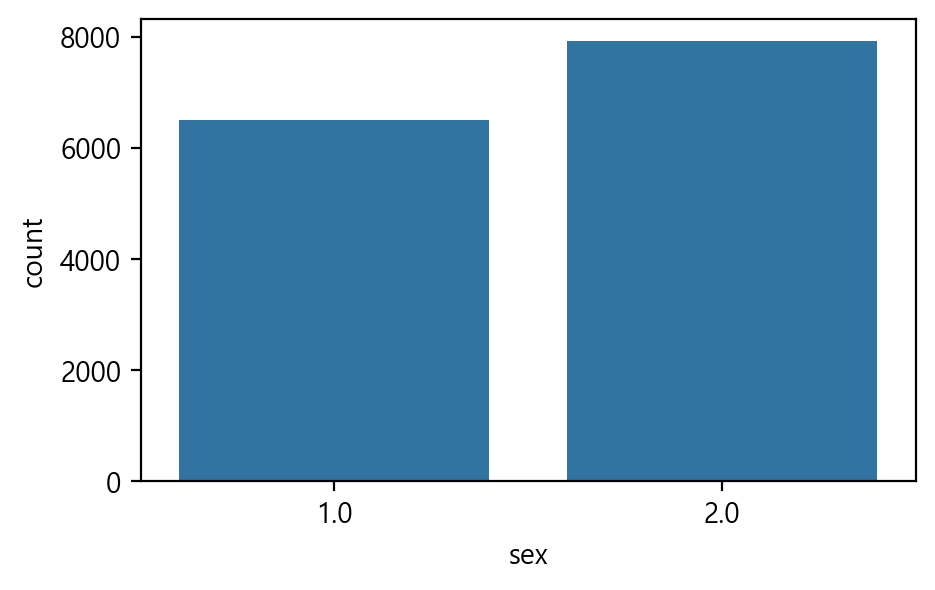

In [20]:
sns.countplot(welfare, x='sex')

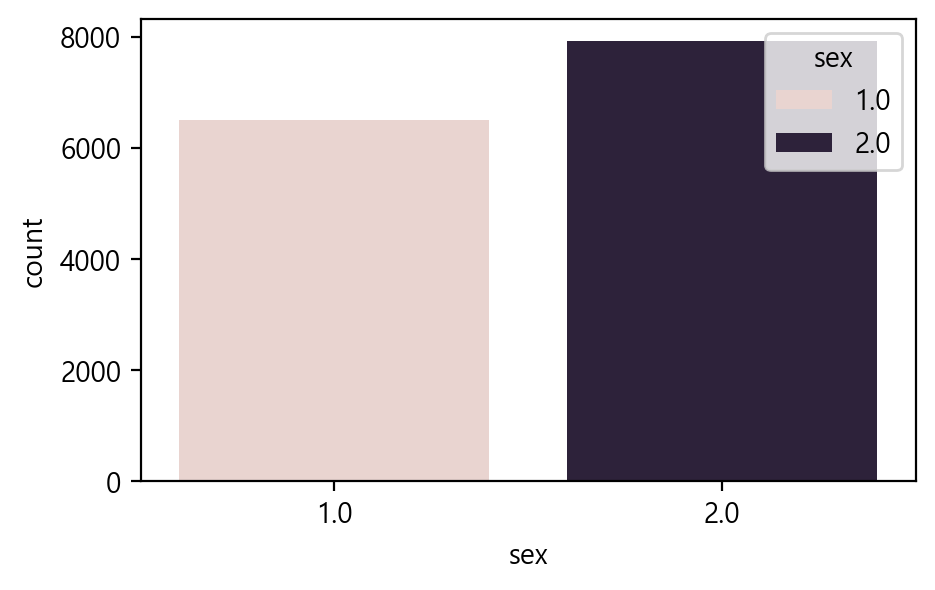

In [21]:
sns.countplot(welfare, x='sex', hue='sex');

In [22]:
welfare.income.dtypes

dtype('float64')

In [24]:
welfare.income.describe()

count    4534.00
mean      268.46
std       198.02
min         0.00
25%       150.00
50%       220.00
75%       345.75
max      1892.00
Name: income, dtype: float64

In [25]:
welfare.income.isna().sum()

9884

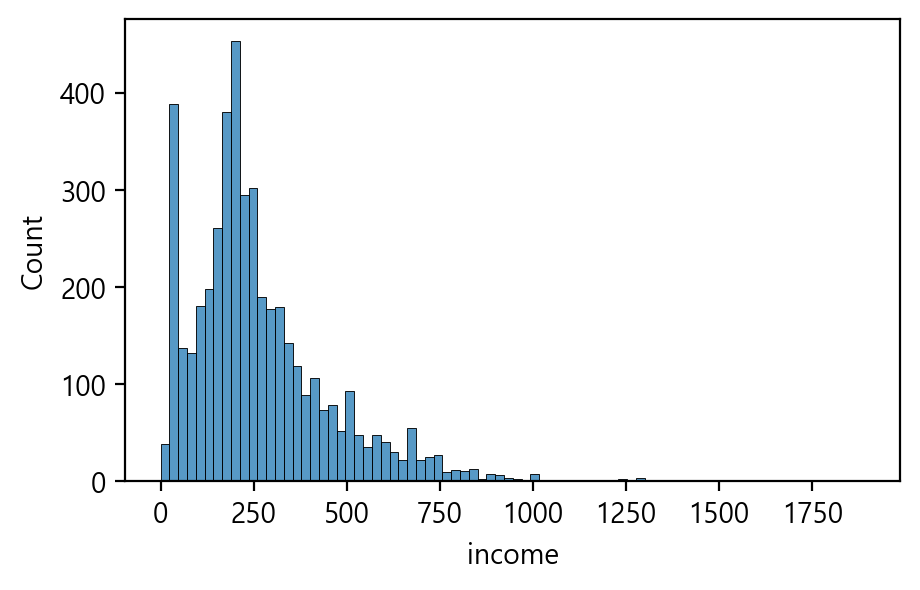

In [26]:
sns.histplot(welfare, x='income');

In [27]:
sex_income = welfare.dropna(subset=['income']) \
                    .groupby('sex', as_index=False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,1.0,349.04
1,2.0,186.29


In [28]:
sex_income2 = welfare.groupby('sex', as_index=False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income2

,sex,mean_income
0,1.0,349.04
1,2.0,186.29


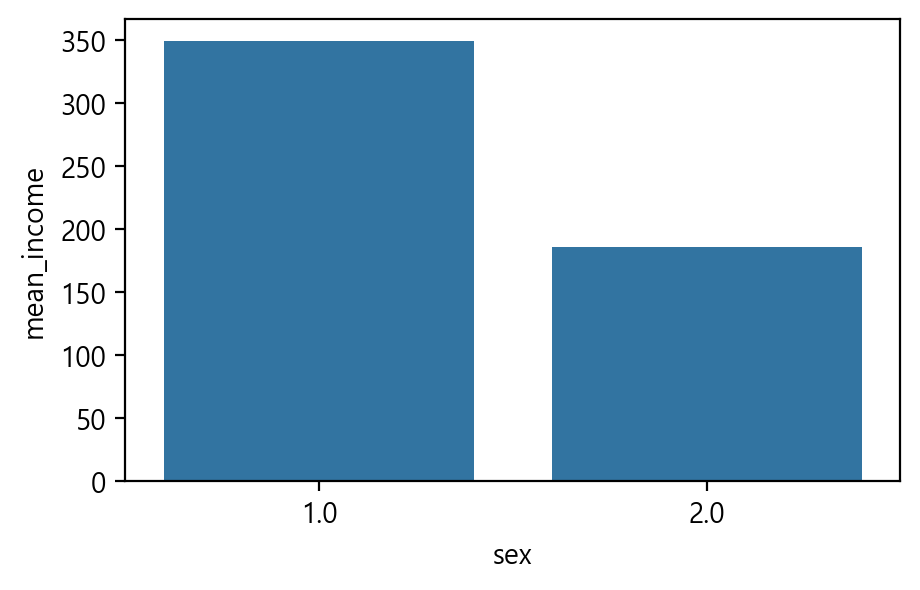

In [29]:
sns.barplot(sex_income, x='sex', y='mean_income');

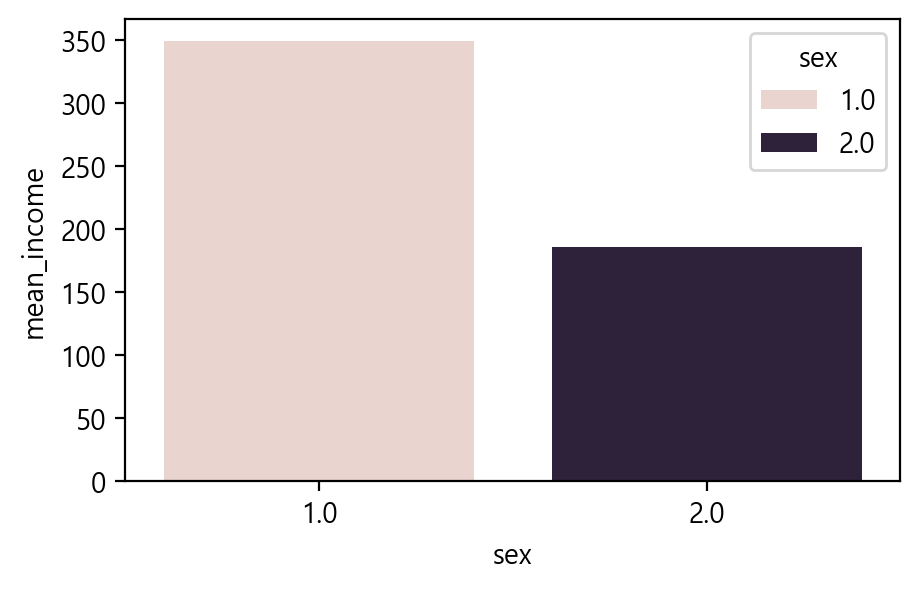

In [30]:
sns.barplot(sex_income, x='sex', y='mean_income', hue='sex');

## 나이와 월급의 관계

In [31]:
welfare.birth.describe()

count    14418.00
mean      1969.28
std         24.40
min       1907.00
25%       1948.00
50%       1968.00
75%       1990.00
max       2018.00
Name: birth, dtype: float64

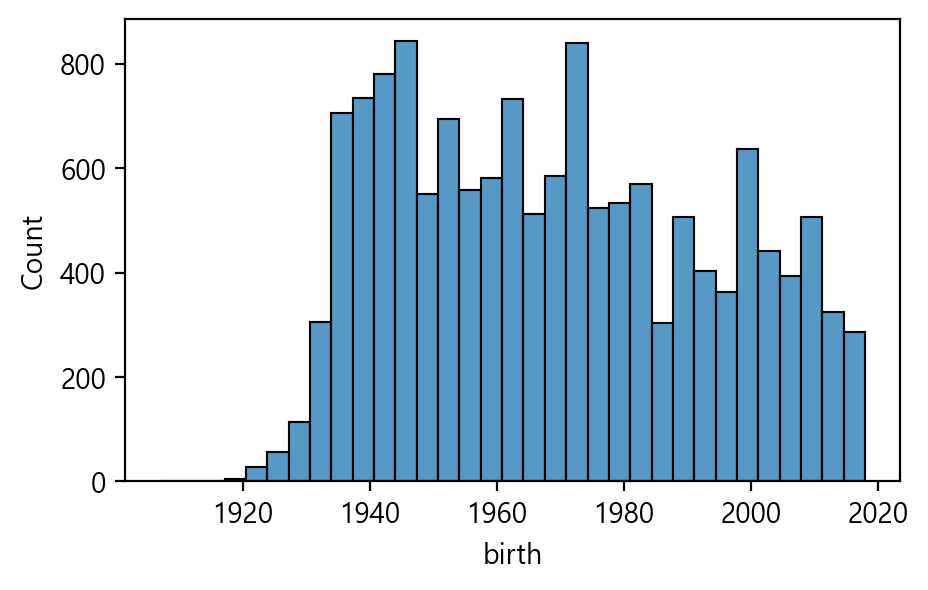

In [32]:
sns.histplot(welfare, x='birth');

In [33]:
welfare.birth.isna().sum()

0

In [34]:
welfare[welfare.birth == 9999]

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5


In [35]:
welfare = welfare.assign(age= 2019 - welfare['birth'])
welfare.age.describe()

count    14418.00
mean        49.72
std         24.40
min          1.00
25%         29.00
50%         51.00
75%         71.00
max        112.00
Name: age, dtype: float64

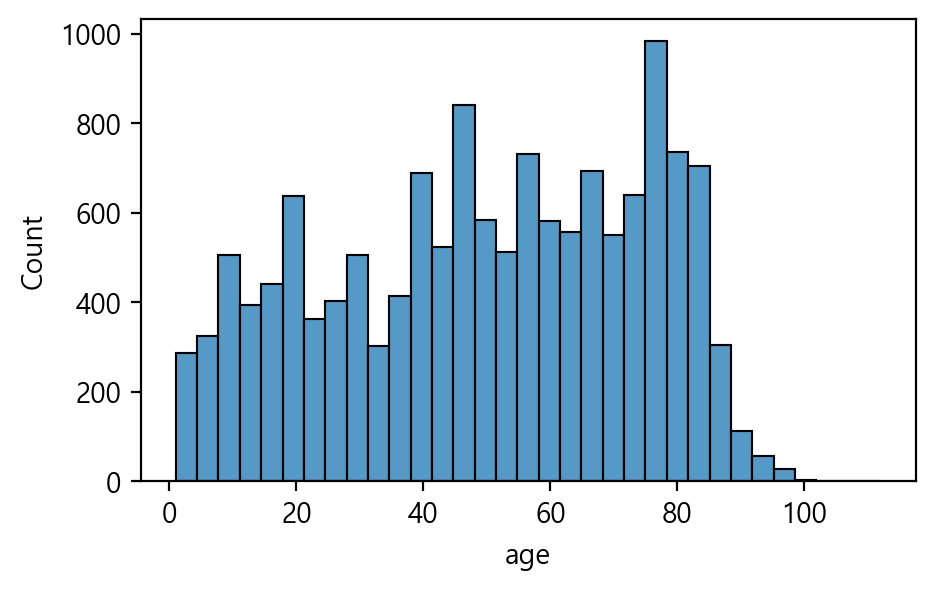

In [36]:
sns.histplot(welfare, x='age');

In [39]:
age_income = welfare.dropna(subset = ['income']) \
                    .groupby('age'
                             ) \
                    .agg(mean_income = ('income', 'mean'))
age_income

,mean_income
age,
18.0,162.00
19.0,121.33
20.0,136.40
21.0,123.67
22.0,179.68
...,...
87.0,27.00
88.0,27.00
89.0,27.00


In [40]:
age_income.head()

,mean_income
age,
18.0,162.00
19.0,121.33
20.0,136.40
21.0,123.67
22.0,179.68


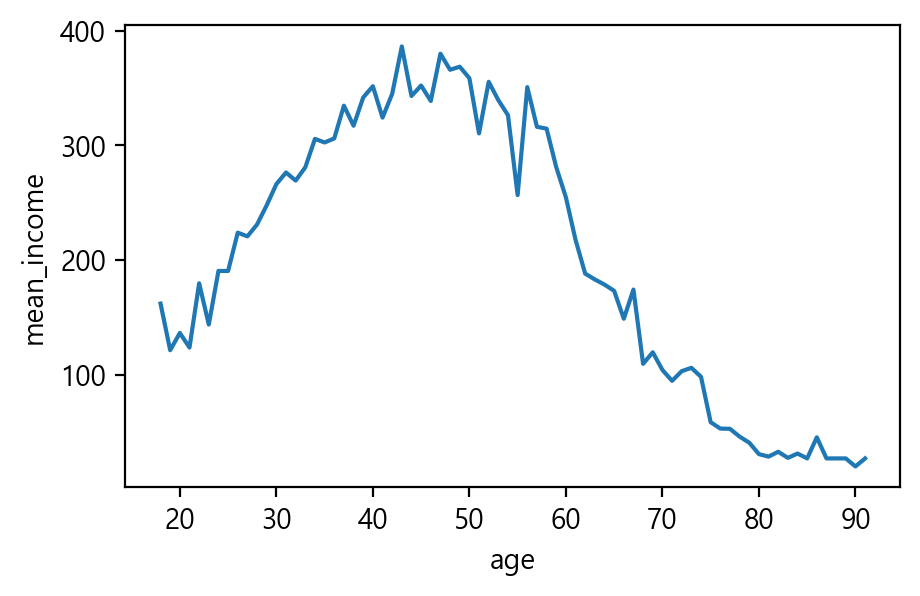

In [41]:
sns.lineplot(age_income, x='age', y = 'mean_income');

In [42]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young', 
                                np.where(welfare['age'] <= 59, 'middle', 'old')))
welfare.ageg.value_counts()

ageg
old       5743
middle    5066
young     3609
Name: count, dtype: int64

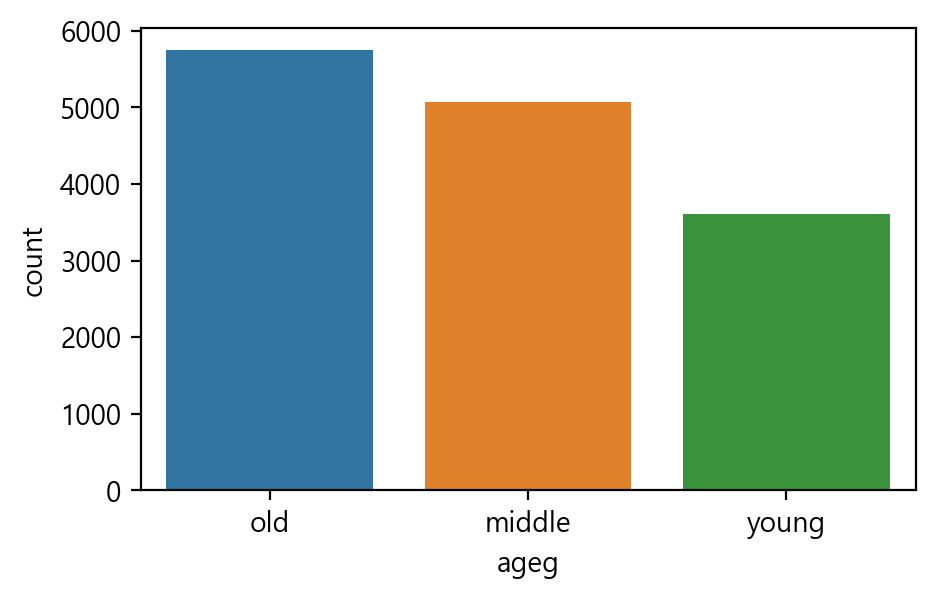

In [43]:
sns.countplot(welfare, x='ageg', hue='ageg');

In [44]:
ageg_income = welfare.dropna(subset = ['income']) \
                     .groupby('ageg', as_index=False) \
                     .agg(mean_income = ('income', 'mean'))
ageg_income

,ageg,mean_income
0,middle,329.74
1,old,126.26
2,young,202.60


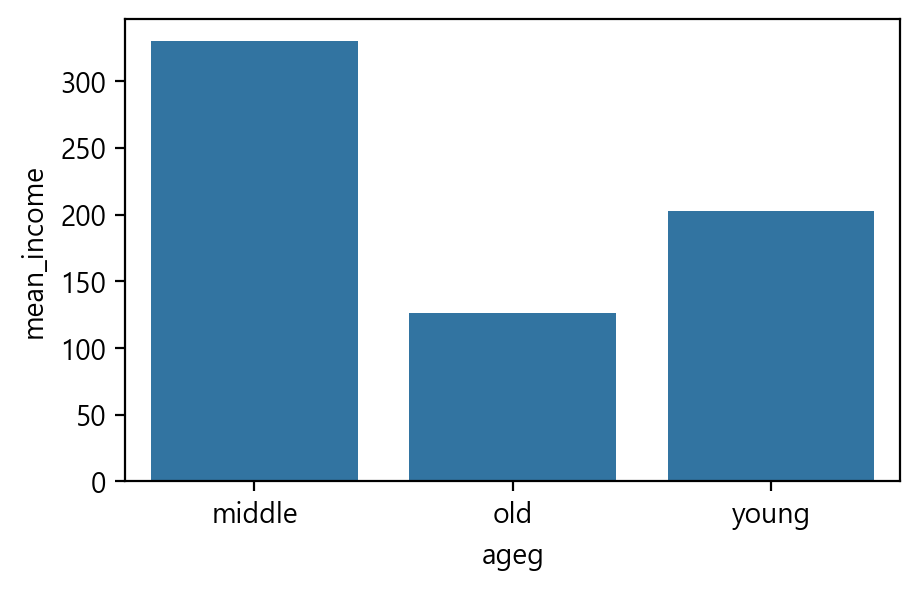

In [45]:
sns.barplot(ageg_income, x='ageg', y='mean_income');

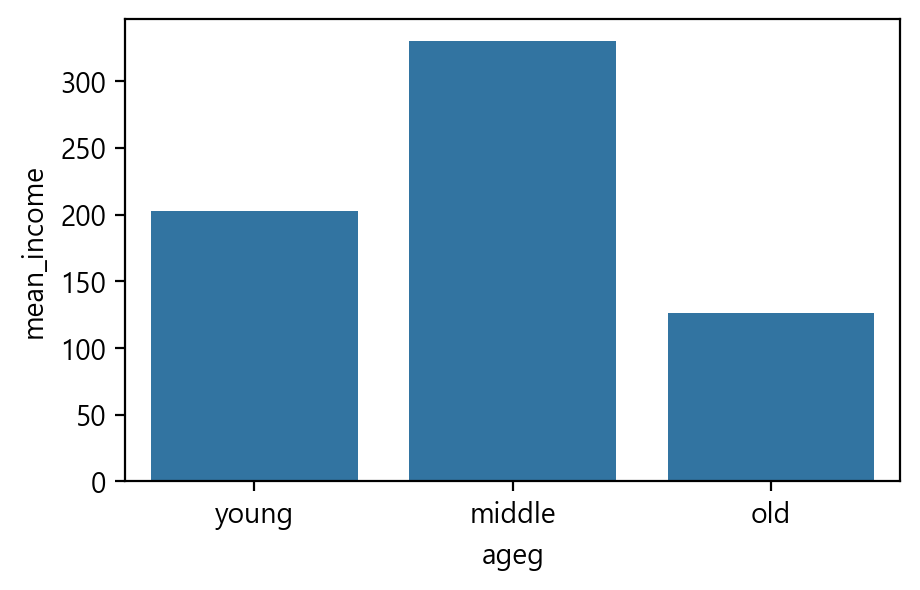

In [46]:
sns.barplot(ageg_income, x='ageg', y='mean_income', order=['young', 'middle', 'old']);

### 10주차 종료, 11주차는 09-5부터 시작